## Homework 06

Create a notebook: ***homework_06.ipynb*** and inside make function:

a function called `integral_monte_carlo_1D(integrand,lim1,lim2,N)` (with that order) that receives four parameters: integrand (function), limit1, limit2 and number of iterations `N`, and returns the value of `I` (just the numerical value)  
*use vectorized form of the calculations

Test your funcion on the following integral:

$$\int_{0}^{4} \sqrt[4]{15 x^3 + 21x^2 + 41x + 3} \cdot e^{-0.5x} dx$$

 where the integrand is
$$f(x)=\sqrt[4]{15 x^3 + 21x^2 + 41x + 3} \cdot e^{-0.5x}$$

compare with the scipy.integrate.quad results


Aplicaré a este caso un método de Montecarlo basado en el uso del valor medio, tal como en este caso, donde $f$ es continua en todo el dominio de integración, se tiene

$
\
\frac{1}{b-a} \int_{a}^{b}  \! f(x) \, dx =  \overline{f(x)}
\
$

donde $\overline{f(x)}$ es el valor medio de la función en el intervalo. 
Si puede estimarse de alguna manera el valor medio de los valores de la función en el intervalo se obtiene una aproximación al valor de la integral, tanto más cercana como cercana sea la aproximación a este valor medio reescribiendo la expresión anterior como

$
\
\int_{a}^{b}  \! f(x) \, dx = (b-a) \overline{f(x)}
\
$

Ahora se considera el problema de obtener el valor medio. Para obtenerlo haré lo siguiente, la aplicación del método de Montecarlo en este caso consiste en obtener una determinada cantidad de puntos aleatorios en el dominio de la función, y evaluar el valor medio de la función evaluada en estos puntos. Con ello se obtiene una aproximación a la media de la función en el intervalo. 

In [60]:
import numpy as np
from scipy.integrate import quad

In [61]:
def integrand(x):
  z = 15*x**3 + 21*x**2 + 41*x + 3
  y = np.power(z,1/4) * np.exp( (-1/2)*x )
  return y

In [62]:
def integral_monte_carlo_1D(integrand,lim1,lim2,N_it):
  f=integrand
  a=lim1
  b=lim2

  x=np.random.uniform(lim1,lim2,N_it)
  y = f(x)

  media = np.mean(y)
  I=(b-a)*media

  return I


Ahora, procedemos a evaluar la integral utilizando la nueva función creada. 

In [63]:
a=0
b=4
N=100

In [64]:
I = integral_monte_carlo_1D(integrand,a,b,N)

print(f"La integral obtenida por el método de Montecarlo arroja un valor de: {I} para esta integral")

La integral obtenida por el método de Montecarlo arroja un valor de: 5.7352892675363565 para esta integral


In [65]:
I_Scipy, error = quad(integrand, a, b)

print(f"La integral obtenida por el método de Scipy arroja un valor de: {I_Scipy} ± {error} para esta integral")

La integral obtenida por el método de Scipy arroja un valor de: 5.767433490695931 ± 5.492382344683848e-10 para esta integral


Teniendo en cuenta la elevada precisión que proporciona Scipy.integrate.quad, la aproximación obtenida por montecarlo usando únicamente 100 puntos parece bastante buena. 
Sin embargo, debe tenerse en cuenta que en cada nuevo intento de calcular esta función usando la función de Montecarlo implementada manualmente, el resultado da relativamente distinto, debido a la manera aleatoria en que se calcula. (Lo cual puede verificarse ejecutando la celda varias veces seguidas.
Intentando de nuevo...

In [66]:
I = integral_monte_carlo_1D(integrand,a,b,N)

print(f"La integral obtenida por el método de Montecarlo arroja un valor de: {I} para esta integral")

La integral obtenida por el método de Montecarlo arroja un valor de: 5.717409746329991 para esta integral


Tal como puede verse, la variación de la primera cifra decimal es dificil de rastrear, una mejor manera de estimar la precisión de esta aproximación, es por medios estadísticos. Considere entonces una versión que tiene en cuenta el error en esta aproximación. 

In [67]:
#Le añadiré a la versión inicial un nuevo argumento, la cantidad de repeticiones que se desea calcular la integral. 
#La idea es calcular M veces la misma integral, entregar como valor central el valor medio de las M integrales obtenidas 
# y devolver como error en la aproximación la desviación estandar de estos valores. 


def integral_monte_carlo_1D_renovada(integral_monte_carlo_1D,lim1,lim2,N_point,M_it):

  I=[]

  for i in range(0,M,1):
    I.append(  integral_monte_carlo_1D(integrand,lim1,lim2,N_point) )

  I=np.array(I)
  I_media = np.mean(I)
  I_error=2*np.std(I)

  return I_media, I_error

In [68]:
M=100
I, error = integral_monte_carlo_1D_renovada(integral_monte_carlo_1D,a,b,N,M)

print(f"La integral obtenida por el método de Montecarlo retorna el valor de: {I} ± {error} despues de usar {M} iteraciones")

La integral obtenida por el método de Montecarlo retorna el valor de: 5.760998118923365 ± 0.27479195838208653 despues de usar 100 iteraciones


En donde podemos ver que efectivamente, el error asociado a la primera cifra era un poco más elevado de lo que se podía apreciar solamente por el valor que la función retornaba. 
Si bien el método de Montecarlo es sencillo y fácil de interpretar siempre debe tenerse en cuenta que sus resultados y la precisión de los mismos están siempre sujetos y requieren a un análisis estadístico. 

Por último, el método implementado computacionalmente claramente mejora también si se toma una mayor cantidad de números aleatorios. 

In [69]:
N=10000
M=10000

I, error = integral_monte_carlo_1D_renovada(integral_monte_carlo_1D,a,b,N,M)

print(f"La integral obtenida por el método de Montecarlo retorna el valor de: {I} ± {error} despues de usar {M} iteraciones")

La integral obtenida por el método de Montecarlo retorna el valor de: 5.767371048058267 ± 0.02598859349560924 despues de usar 10000 iteraciones


Se trata entonces de un código relativamente lento, pero proporciona ya una precisión por el orden de las milésimas para el valor de la integral. 

Solo me queda una duda
¿La calidad de los números aleatorios (es decir, su caracter pseudoaleatorio o los métodos por los que se generan) tendrán alguna influencia en la efectividad de estos métodos de Montecarlo?
Espero poder averiguarlo algún día. 

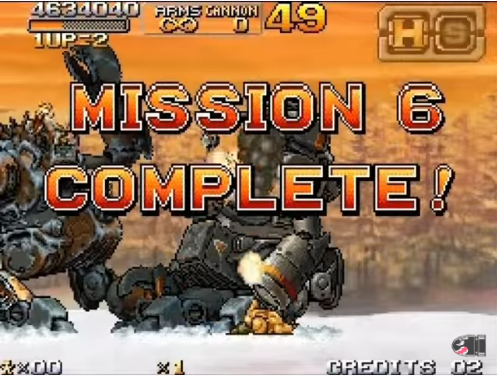